# PYTHON FOR DATA ANALYSIS TP7 : 



## 1) Machine learning 101  2/2

Last time we've scratched the surface of ML with Sci Kit Learn. We've loaded example datasets, learned how to split data into train set and train set, choosed some classifiers, manually decided some hyperparameter, trained the model and evaluated it using accuracy.

This time you will dig further using various online materials. You will learn new metrics to validate the efficiency of your model, and also methods to automatically choose the best combination of hyperparameters for your models.

You will find below pointers to articles on these subjects, with code examples. These lessons are very progressive and well written, please follow them conscientiously, in order, run all the cells, and make sure to understand every single part of it : 


### 1.1) Unsupervised learning

We've only practiced supervised learning, by feeding datasets with labelled data.
ML is also useful with unlabeled data, to help us identify distinct groups of data :

https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html


### 1.2) Model validation metrics ( Recall, precision, confusion matrix, ROC curve and AOC, F1)

Last time we only used Accuracy to score efficiency of our models. There are many more available metrics. Choosing one of them will depend of the model, and on the type of prediction you're working on.

https://developers.google.com/machine-learning/crash-course/classification/video-lecture
( video and following sections of the classification chapter)

( and a cheat sheet :
https://stanford.edu/~shervine/l/fr/teaching/cs-229/pense-bete-machine-learning-petites-astuces )




### 1.3) Model validation functions, cross validation and gridsearch for hyperparameter tuning

Scikit Learn propose useful features to help us validate our models, and tune them with the best hyperparameters : 

https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html


### 1.4) With this knowledge, you should be able to understand these 3 notebooks :


https://github.com/robderon/Python-for-data-analysis/tree/master/cours%20romain%20jouin



### 1.4) to go further, after the lesson, you should read full chapter 5 of the Python Data Science Handbook

https://jakevdp.github.io/PythonDataScienceHandbook/index.html



### 1.5) .. and spend some time on the scikit learn documentation


https://scikit-learn.org/stable/getting_started.html

https://scikit-learn.org/stable/modules/model_evaluation.html

https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics

https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py




 

# 2) Releasing your models using an API

Now that you are able to choose, tune and train a model for your dataset, You want to make it available to the outside world, or to your client only.

Making it available as a REST API is a simple and efficient solution, that can be easily integrated into your customer's infrastructure.


One big question remains : Which Python Framework to choose ?

By far, the most popular Python frameworks are Django and Flask. They are both well documented and maintained. Django is more advanced, more strict  but it is also harder to use. it has a clear MVC organization, integrated ORM, but it feels like too much software for small projects. On the other side, Flask is small, simpler, and less strict.



- You will find here a step by step guide for the Flask solution :  
  https://www.kdnuggets.com/2019/01/build-api-machine-learning-model-using-flask.html


- You will find p 157 of formation_intro_python_officielle.pdf a step by step guide for the Django solution.

I let you decide which way you want to go !

# 3) Exercise 

- Train a Scikit learn prediction model to detect fake news in english.
- Release your model through a Rest Api
- Present your work using Curl as a http client


Text data must be transformed to numerical data to become useful for our models. Multiple techniques exist. please read following articles on the subject :

https://medium.com/@paritosh_30025/natural-language-processing-text-data-vectorization-af2520529cf7

( to go further :  
https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html )




# Le dataset
https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=Fake.csv

- title : The title of the article
- text : The text of the article
- subject : The subject of the article
- date : date of the article

In [1]:
import pandas as pd
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")


In [2]:
#Transformat
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
#On ajoute une colonne pour Y avec 0 = fake et 1 = true
fake['Y'] = 0
true['Y'] = 1

#On regroupe les deux datasets
data = pd.concat([fake, true]).reset_index(drop = True)
data.head()

,title,text,subject,date,Y
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [4]:
#Avant le split par sécurité je vais mélanger les données
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)
data.head(10)

,title,text,subject,date,Y
0,TRUMP SAYS “YES” To Federal Funding For Planne...,"Sounds like a great deal, right? After all, Pl...",politics,"Mar 7, 2017",0
1,Ukrainian MP offers more details on alleged pa...,KIEV (Reuters) - A Ukrainian lawmaker on Frida...,politicsNews,"August 19, 2016",1
2,CORRUPT STATE DEPARTMENT Deletes Key Info From...,This is seriously concerning! James Rosen call...,Government News,"Jun 2, 2016",0
3,'Deadline of deadlines' in Brexit divorce talk...,BRUSSELS (Reuters) - Theresa May must deliver ...,worldnews,"December 5, 2017",1
4,TREY GOWDY SLAMS Mueller Teams Over Leaks Abou...,"Republican Rep. Trey Gowdy, the leader of the ...",left-news,"Oct 29, 2017",0
5,Yes he can: 'Clever boy' Obama returns to Indo...,(This story corrects typo in 10th paragraph.)...,politicsNews,"June 28, 2017",1
6,"White House, intel chiefs want to make digital...",WASHINGTON (Reuters) - The White House and U.S...,politicsNews,"June 7, 2017",1
7,Factbox: Trump on Twitter (July 27) - NY Times...,The following statements were posted to the ve...,politicsNews,"July 27, 2017",1
8,"Fearing far-right surge, Merkel tells Germans ...",BERLIN (Reuters) - Fears in Germany that vote...,worldnews,"September 21, 2017",1
9,RECKLESS: Democratic Party Creating a ‘Russian...,21st Century Wire says The Hillary Clinton cam...,US_News,"October 13, 2016",0


<AxesSubplot:xlabel='Y'>

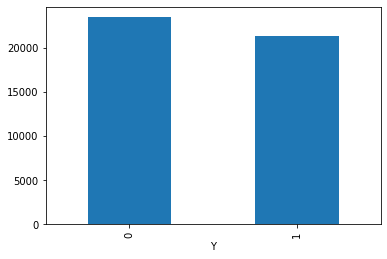

In [5]:
#La repartition du dataset
data.groupby(['Y'])['text'].count().plot(kind='bar')

In [6]:
#Recuperation du text et du Y
data_ = data[["text","Y"]]
data_.head()

,text,Y
0,"Sounds like a great deal, right? After all, Pl...",0
1,KIEV (Reuters) - A Ukrainian lawmaker on Frida...,1
2,This is seriously concerning! James Rosen call...,0
3,BRUSSELS (Reuters) - Theresa May must deliver ...,1
4,"Republican Rep. Trey Gowdy, the leader of the ...",0


In [7]:
#Traitement des données
#On commence par mettre tout en minuscule
data_['text'] = data_['text'].apply(lambda x: x.lower())

#On retire les mots inutiles aussi appelé StopWord (ex :the, in..) qui sont présent trop régulierement 
#et n'apporte pet ou pas d'information
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_['text'] = data_['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

<ipython-input-7-1617465db476>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['text'] = data_['text'].apply(lambda x: x.lower())
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kenny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-7-1617465db476>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['text'] = data_['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [8]:
#Séparons les datasets en train, validation et test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(data_["text"], data_["Y"], random_state=1)

In [9]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

algo = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

modele = algo.fit(Xtrain, ytrain)

In [10]:
modele.score(Xtest, ytest)

0.9893986636971047

In [11]:
prediction = modele.predict(Xtest)

In [12]:
def draw_confusion_matrix(y_test, predictions, title):
    """
    Créé et affiche la matrice de confusion des données de Y_test et de celles sur lesquelles on a fait la prédiction.
    Permet d'évaluer la qualité de la classification souhaitée.
    Plus les valeurs diagonales sont élevées, plus le classifieur prédit correctement.
    """
    from sklearn.metrics import confusion_matrix,accuracy_score
    import matplotlib.pyplot as plt
    cm    = confusion_matrix(y_test, predictions)
    accur = accuracy_score  (y_test, predictions)
    
    plt.matshow  (cm)
    plt.ylabel   ('True Label')
    plt.xlabel   ('Predicted Label')
    plt.suptitle ('Confusion matrix (Accuracy of %.2f) for [%s]'%(accur,title))
    plt.colorbar ()
    plt.show     ()

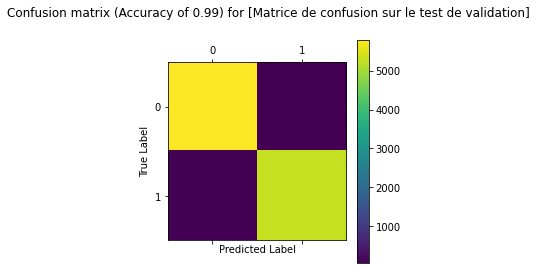

In [13]:
draw_confusion_matrix(ytest,prediction,"Matrice de confusion sur le test de validation")

In [14]:
#enregistrenotre modele
import pickle
pickle.dump(modele, open('final_prediction.pickle', 'wb'))

In [15]:
!pip install flask
!pip install flask_cors

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [42]:
#Cree un serveur local
from flask import Flask, request, redirect, url_for, flash, jsonify
import numpy as np
import pickle as p
import json
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

import socket
import threading
import uuid
from typing import Any, Callable, cast, Optional

from flask import Flask, abort, jsonify
from flask_cors import cross_origin
from werkzeug.serving import run_simple

app = Flask('DataServer')

_port: int = 5000

#dans /api on peut faire des predictions
@app.route('/api/', methods=['GET','POST'])
def makecalc():
    data = request.get_json()
    print(data)
    data = data.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    #prediction = np.array2string(model.predict(data))
    return jsonify("oui")

def _init_port() -> int:
    """Creates a random free port."""
    # see https://stackoverflow.com/a/5089963/2297345
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    sock.bind(('localhost', 4200))

    port = sock.getsockname()[1]
    sock.close()
    return cast(int, port)

def _start_sever() -> None:
    """Starts a flask server in the background."""
    modelfile = 'final_prediction.pickle'
    model = p.load(open(modelfile, 'rb'))
    _port = _init_port()
    thread = threading.Thread(target=lambda: run_simple('localhost', _port, app))
    thread.start()
    
_start_sever()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kenny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
 * Running on http://localhost:4200/ (Press CTRL+C to quit)


In [ ]:
#https://stackoverflow.com/questions/41831929/debug-flask-server-inside-jupyter-notebook

In [43]:
import requests
import json

url = 'http://localhost:4200/api/'

#http://www.legorafi.fr/2016/06/24/the-eu-refuses-to-validate-the-british-referendum-due-to-non-conforming-ballots-to-the-norm-of-the-eu/
data = "Trump hate German"
j_data = json.dumps(data)
headers = {'content-type': 'application/json', 'Accept-Charset': 'UTF-8'}
r = requests.post(url, data=j_data, headers=headers)
print(r, r.text)

[2020-12-17 11:14:19,640] ERROR in app: Exception on /api/ [POST]
Traceback (most recent call last):
  File "c:\users\kenny\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\kenny\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\kenny\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\kenny\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\kenny\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\kenny\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 

Trump hate German
<Response [500]> <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>

